<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />
# Exploratory Data Analysis I

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)<br/>
    - 3.2 [Pre Profiling](#section302)<br/>
    - 3.3 [Preprocessing](#section303)<br/>
    - 3.4 [Post Profiling](#section304)<br/>
4. [Questions](#section4)
    - 4.1 [How many survived after 5 years and how many died before 5 years??](#section401)<br/>
    - 4.2 [How the Positive axillary nodes (Pathologic staging) and survivals are related?](#section402)<br/>
    - 4.3 [How Survivals and Age and Axillary nodes are related?](#section403)<br/>
    - 4.4 [How the survivals and year of operation related?](#section404)<br/>
    - 4.5 [Hypothesis: More women with less axillary nodes are more likely to survive after 5 years](#section405)<br/>
5. [Conclusions](#section5)<br/>  

<a id=section1></a>

### 1. Problem Statement

The notebooks explores the basic use of __Pandas__ and will cover the basic commands of __Exploratory Data Analysis(EDA)__ which includes __cleaning__, __munging__, __combining__, __reshaping__, __slicing__, __dicing__, and __transforming data__ for analysis purpose.

* __Exploratory Data Analysis__ <br/>
Understand the data by EDA and derive simple models with Pandas as baseline.
EDA ia a critical and first step in analyzing the data and we do this for below reasons :
    - Finding patterns in Data
    - Determining relationships in Data
    - Checking of assumptions
    - Preliminary selection of appropriate models
    - Detection of mistakes 
    
We will address the following problem statments using EDA
    - How many survived after 5 years and how many died before 5 years?
    - How the Positive axillary nodes (Pathologic staging) and survivals are related?
    - How Survivals and Age and Axillary nodes are related?
    - How the survivals and year of operation related?
    

<a id=section2></a>

### 2. Data Loading and Description

<a id=section201></a>

- The dataset consists of the information about people suffered breast canacer. Thereare 4 variables present in the dataset which includes data on age, yop, pan, status. 
- The dataset comprises of __306 observations of 4 columns__. Below is a table showing names of all the columns and their description.

| Column Name            | Description                                               |
| -------------          |:-------------                                            :| 
| __Age__                | Age of patient at time of operation (numerical)           | 
| __Years_of_operation__ | Patient's year of operation (year - 1900, numerical)      |  
| __Pos_axillary_nodes__ | Number of positive axillary nodes detected (numerical)    | 
| __Status__             | Surival status (class attribute) (1 = the patient survived 5 years or longer, 2 = = the patient died within 5 year) 

#### Some Background Information
Breast cancer is cancer that develops from breast tissue. Signs of breast cancer may include a lump in the breast, a change in breast shape, dimpling of the skin, fluid coming from the nipple, a newly inverted nipple, or a red or scaly patch of skin.

__Symptoms:__  Lump in a breast, change in breast etc.,<br>
__Risk factors:__  Female, obesity, lack of exercise etc.,<br>
__Treatment:__  Surgery, radiation therapy, chemot etc.,<br>
__Diagnostic method:__  Tissue biopsy

__Lymph Nodes__ are small clumps of immune cells that act as filters for the lymphatic system. The lymphatic system runs throughout the body (like the circulatory (blood) system) and carries fluid and cells.If breast cancer spreads, the lymph nodes in the underarm (the axillary lymph nodes) are the first place it’s likely to go.The number of axillary lymph nodes can vary from person to person, ranging from 5 nodes to more than 30.Lymph node status is highly related to prognosis.
    
__Lymph Node-negative__ means the axillary lymph nodes do not contain cancer.<br>
__Lymph Node-positive__ means the axillary lymph nodes contain cancer.

#### Importing packages                                          

In [1]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

#from subprocess import check_output



#### Importing the Dataset

In [2]:
#df_bcancer = pd.read_csv("https://github.com/insaid2018/Term-1/blob/master/Data/Projects/Breast_cancer_survival.csv")     # Importing training dataset using pd.read_csv

df_bcancer = pd.read_csv("D:/INSAID/Study/Project/Breast_cancer_survival.csv")  

df_bcancer.head()

,Age,Years_of_operation,Pos_axillary_nodes,Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


<a id=section3></a> 
## 3. Data Profiling

- In the upcoming sections we will first __understand our dataset__ using various pandas functionalities.
- Then with the help of __pandas profiling__ we will find which columns of our dataset need preprocessing.
- In __preprocessing__ we will deal with erronous and missing values of columns. 
- Again we will do __pandas profiling__ to see how preprocessing have transformed our dataset.

### 3.1 Understanding the Dataset

To gain insights from data we must look into each aspect of it very carefully. We will start with observing few rows and columns of data both from the starting and from the end


In [3]:
df_bcancer.shape                                                    # This will print the number of rows and comlumns of the Data Frame

(306, 4)

bc_data has __306 rows__ and __4 columns.__

In [4]:
df_bcancer.columns                                            # This will print the names of all columns.

Index(['Age', 'Years_of_operation', 'Pos_axillary_nodes', 'Status'], dtype='object')

In [5]:
df_bcancer.head()

,Age,Years_of_operation,Pos_axillary_nodes,Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


<a id=section301></a>

In [6]:
df_bcancer.tail()                                                   # This will print the last n rows of the Data Frame

,Age,Years_of_operation,Pos_axillary_nodes,Status
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


In [7]:
df_bcancer.info()                                                   # This will give Index, Datatype and Memory information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age                   306 non-null int64
Years_of_operation    306 non-null int64
Pos_axillary_nodes    306 non-null int64
Status                306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [8]:
df_bcancer.describe()

,Age,Years_of_operation,Pos_axillary_nodes,Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [9]:
df_bcancer.isnull().sum()

Age                   0
Years_of_operation    0
Pos_axillary_nodes    0
Status                0
dtype: int64

From the above output we can conclude that there are no columns that contains __null values__. 

### 3.2 Pre Profiling

- By pandas profiling, an __interactive HTML report__ gets generated which contins all the information about the columns of the dataset, like the __counts and type__ of each _column_. Detailed information about each column, __coorelation between different columns__ and a sample of dataset.<br/>
- It gives us __visual interpretation__ of each column in the data.
- _Spread of the data_ can be better understood by the distribution plot. 
- _Grannular level_ analysis of each column.

In [10]:
profile = pandas_profiling.ProfileReport(df_bcancer)
profile.to_file(outputfile="CancerData_before_preprocessing.html")

Here, we have done Pandas Profiling before preprocessing our dataset, so we have named the html file as __bcc_before_preprocessing.html__. Take a look at the file and see what useful insight you can develop from it. <br/>
Now we will process our data to better understand it.

### 3.3 Preprocessing

- Dealing with missing values<br/>
  - There is no discrepancies found in the data 
  - Year of operation is of two digits
  - Found __44.4% zeros__ of __Pos_axillary_nodes__, but these are also __valid__ data, which indicates early stages of cancer – Either No cancer was found in the lymph nodes or only areas of cancer smaller than 0.2 mm are in the lymph nodes.<br/><br/>
  
  - __TNM staging system__ The most commonly used tool that doctors use to describe the stage of the cancer. Doctors use the results from diagnostic tests and scans to answer these questions:<br/>
      - __Tumor (T):__ How large is the primary tumor? Where is it located?
      - __Node (N):__ Has the tumor spread to the lymph nodes? If so, where and how many?
      - __Metastasis (M):__ Has the cancer spread to other parts of the body? If so, where and how much?
  - The __“N”__ in the __TNM staging system__ stands for __lymph nodes__.<br/><br/>
  
  - __Clinical staging:__ Evaluates the lymph nodes __before the surgery__, based on other tests and/or a physical examination.
  - __Pathologic staging:__ Evaluates the lymph nodes __after the surgery__, which is a more accurate assessment.
  
      - NX: The lymph nodes were not evaluated.
      - N0: Either No cancer was found in the lymph nodes or Only areas of cancer smaller than 0.2 mm are in the lymph nodes.
      - N1: The cancer has spread to 1 to 3 axillary lymph nodes and/or the internal mammary lymph nodes.
      - N2: The cancer has spread to 4 to 9 axillary lymph nodes. Or it has spread to the internal mammary lymph nodes, but not the axillary lymph nodes.
      - N3: The cancer has spread to 10 or more axillary lymph nodes. Or it has spread to the lymph nodes located under 

Convert two digits year of operation to four digits

In [11]:
df_bcancer['Years_of_operation'] = 1900 + df_bcancer['Years_of_operation'] #Change year of oeration from 2 digits to 4 digits
df_bcancer.head()

,Age,Years_of_operation,Pos_axillary_nodes,Status
0,30,1964,1,1
1,30,1962,3,1
2,30,1965,0,1
3,31,1959,2,1
4,31,1965,4,1


Create a function to categorize different pathological stages of cancer depedning on Positive Axillary Nodes

| Positive Axillary Nodes|Pathologic Stage|
|------------------------|:--------------:|
| 0-3                    |  N0            |
| 4-10                   |  N1            |
| >10                    |  N2            |

In [12]:
def Compute_Stage(pan):
    if(pan==0):
        return 'PS-N0'
    elif (pan > 0 and pan <= 3):
        return 'PS-N1'
    elif (pan > 3 and pan <= 9):
        return 'PS-N2'
    elif (pan >= 10):
        return 'PS-N3'
#print(Compute_Stage(10))   


Create additional column __PAN_Stage__ which computes __Pos_axillary_nodes__ and categorizes each patient with different pathological stages of cancer.

In [13]:
#Add additional  a function to categorize different pathological stages of cancer depedning on Positive Axillary Nodes
df_bcancer['PAN_Stage']= df_bcancer['Pos_axillary_nodes'].apply(Compute_Stage)
print("Pathologic axillary nodes staging column created")
df_bcancer.head()

Pathologic axillary nodes staging column created


,Age,Years_of_operation,Pos_axillary_nodes,Status,PAN_Stage
0,30,1964,1,1,PS-N1
1,30,1962,3,1,PS-N1
2,30,1965,0,1,PS-N0
3,31,1959,2,1,PS-N1
4,31,1965,4,1,PS-N2


In [14]:
def Compute_SurvivalBracket(x):
    """ 
    ==1 = '>5years'
    ==2  = '<5years'
    """
    if x == 1:
        return '>5years'
    elif x == 2:
        return '<5years'

df_bcancer['Survived'] = df_bcancer['Status'].apply(Compute_SurvivalBracket)
print("Survival Bracket column created")
df_bcancer.head()

Survival Bracket column created


,Age,Years_of_operation,Pos_axillary_nodes,Status,PAN_Stage,Survived
0,30,1964,1,1,PS-N1,>5years
1,30,1962,3,1,PS-N1,>5years
2,30,1965,0,1,PS-N0,>5years
3,31,1959,2,1,PS-N1,>5years
4,31,1965,4,1,PS-N2,>5years


In [15]:
def compute_AgeBracket(x):
    """ 
    Return Free if price is zero:
    ==1 = '>5years'
    ==2  = '<5years'
    """
    if x >=30 and x < 40:
        return '30-40'
    elif x >=40 and x < 50:
        return '40-50'
    elif x >=50 and x < 60:
        return '50-60'
    elif x >=60 and x < 70:
        return '60-70'
    elif x >=70 and x < 80:
        return '70-80'
    elif x >=80 and x < 90:
        return '80-90'
    else:
        return '>90'
    
df_bcancer['AgeBracket'] = df_bcancer['Age'].apply(compute_AgeBracket)
print("Age Bracket column created")
df_bcancer.head()

Age Bracket column created


,Age,Years_of_operation,Pos_axillary_nodes,Status,PAN_Stage,Survived,AgeBracket
0,30,1964,1,1,PS-N1,>5years,30-40
1,30,1962,3,1,PS-N1,>5years,30-40
2,30,1965,0,1,PS-N0,>5years,30-40
3,31,1959,2,1,PS-N1,>5years,30-40
4,31,1965,4,1,PS-N2,>5years,30-40


<a id=section304></a>

## 3.4 Post Pandas Profiling

In [16]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(df_bcancer)
profile.to_file(outputfile="CancerData_after_preprocessing.html")
print("Post profiling processing completed....")

Post profiling processing completed....


Now we have post processed the data, now the dataset doesnot contain missing values, we have also introduced new feature named PAN_Stage, AgeBracket and Survival Bracket so that the pandas profiling report after preprocessing will give us more beneficial insights. You can compare the two reports.
In after_preprocessing.html report, observations:
- In the Dataset info, Total Missing(%) = 0.0%
- Number of variables = 6
- Observe the newly created variable PAN_Stage, AgeBracket and Survived, Click on Toggle details to get more detailed information about it.

<a id=section4></a> 
### 4. Questions

<a id=section401></a> 
### 4.1 How many survived after 5 years and how many died before 5 years?

- Using Countplot

Text(0.5, 1.0, 'Pie Plot- Survival')

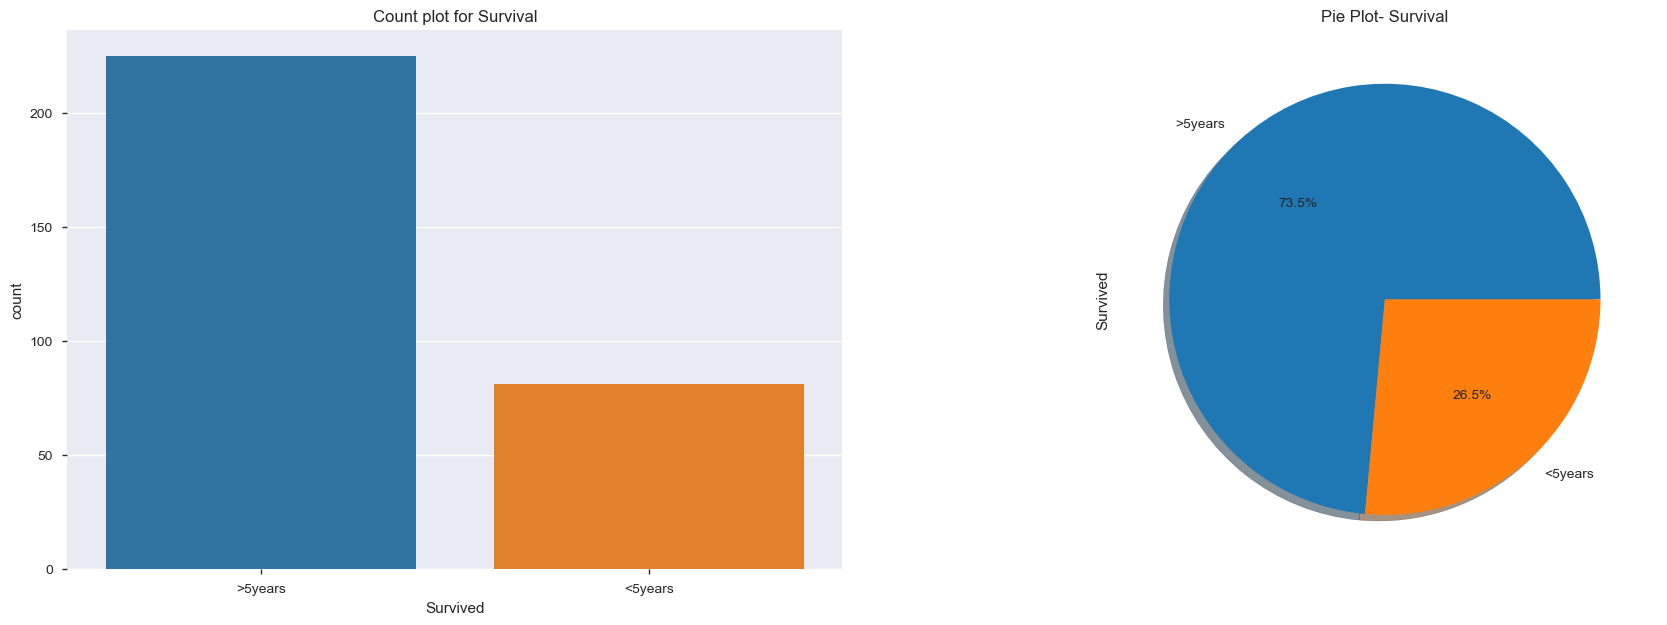

In [17]:
f,ax = plt.subplots(1,2,figsize=(22,7))

dfTemp = df_bcancer[df_bcancer['Age']!=0]
sns.countplot(x='Survived',ax=ax[0], data=dfTemp).set_title('Count plot for Survival')

dfTemp['Survived'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[1].set_title('Pie Plot- Survival')

You can see that __more people survied more than 5 Years.__ To know the exact count:

- Using groupby

In [18]:
df_bcancer.groupby(['Status'])['Status'].count()

Status
1    225
2     81
Name: Status, dtype: int64

Notice that __survived(225) after 5 years is more__ compare to __died(81) before 5 years__

<a id=section402></a> 
### 4.2 How the Positive axillary nodes (Pathologic staging) and survivals are related?

Text(0.5, 1.0, 'Pathologic staging / Survived Distribution')

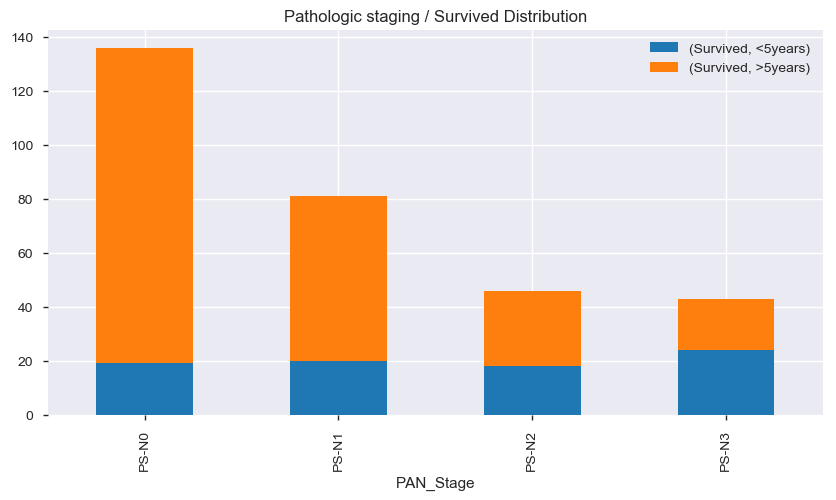

In [19]:
f,ax = plt.subplots(1,1,figsize=(10,5))

dfStack = df_bcancer.groupby(['PAN_Stage','Survived']).agg({'Survived':"count"})
#print(bc_dataTemp.head())
dfStack = dfStack.unstack()
#print(dfStack.head())
dfStack.plot.bar(ax=ax,stacked=True)
ax.legend(loc='best')
ax.set_title('Pathologic staging / Survived Distribution')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1804: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()
No handles with labels found to put in legend.


Text(0.5, 1.0, 'Pathologic staging / Survived Distribution')

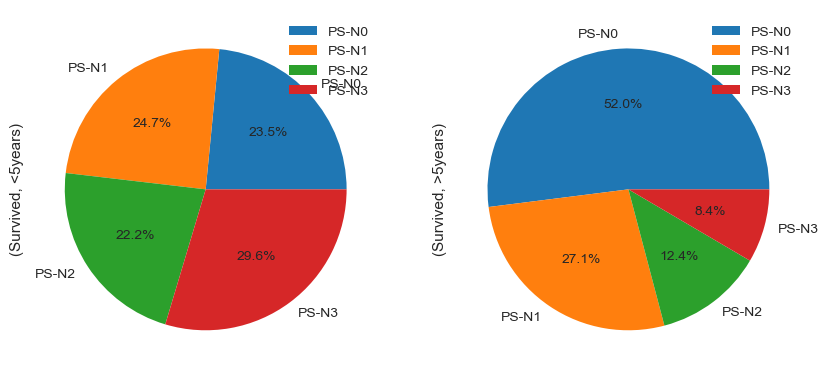

In [20]:
f,ax = plt.subplots(1,2,figsize=(10,7))

dfStack = df_bcancer.groupby(['PAN_Stage','Survived']).agg({'Survived':"count"})
#print(bc_dataTemp.head())
dfStack = dfStack.unstack()
#print(dfStack.head())
dfStack.plot.pie(autopct='%1.1f%%',ax=ax[0],subplots=True)
ax[0].legend(loc='best')
ax[0].set_title('Pathologic staging / Survived Distribution')

In [21]:
df_bcancer.groupby(['PAN_Stage'])['PAN_Stage'].count()

PAN_Stage
PS-N0    136
PS-N1     81
PS-N2     46
PS-N3     43
Name: PAN_Stage, dtype: int64

Notice  
- Rate of patients __survival is more when postivie axillary numbers are low in number, which means initital stages of patholigical stage__
- Rate of patients survival after 5 years __decreases__ as pathologic stage __progresess to next stage__
- Stage __N0 as better chance than N3__

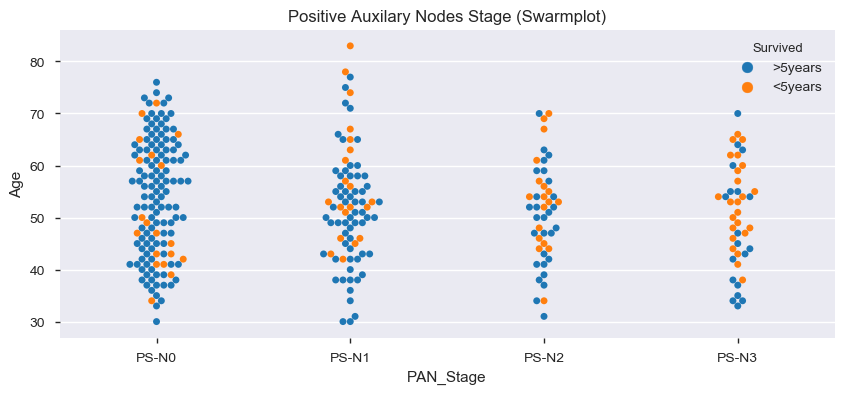

In [22]:
dfTemp = df_bcancer[df_bcancer['Age']!=0].sort_values(by='PAN_Stage',ascending=True)

# Initialize Figure and Axes object
fig, ax = plt.subplots(figsize=(10,4))

# Set title
ax.set_title('Positive Auxilary Nodes Stage (Swarmplot)')

sns.swarmplot(x="PAN_Stage", y="Age", hue="Survived", data=dfTemp,ax=ax)

The swarm plot trend shows as the positive auxiliary nodes increase the survival rate decreases.

- We see the blue dots (>5years) predominating in the case where stage __increases from N0 to N3__
- And as the __stage increased from N0__ the __red__ dots started to outnumber the blue showing the __fall in the survival(<5years)__

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


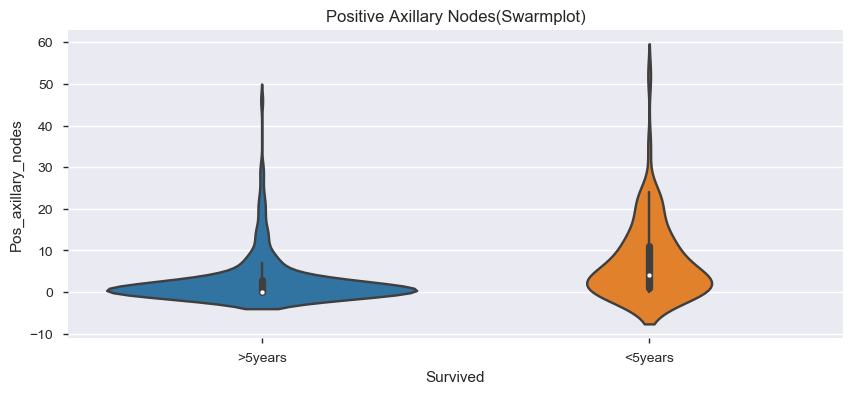

In [23]:
dfTemp = df_bcancer[df_bcancer['Age']!=0]

# Initialize Figure and Axes object
fig, ax = plt.subplots(figsize=(10,4))

# Set title
ax.set_title('Positive Axillary Nodes(Swarmplot)')

# Plot violinplot
sns.violinplot(x='Survived',y = "Pos_axillary_nodes", data=dfTemp)

Above VIOLIN plot shows clearly that women who couldn't survive <5 years after operation was due to the __contraction of high positive axillary lymph nodes__ which __decreased__ the chances of their survival.

<a id=section403></a> 
### 4.3. How Survivals and Age and Axillary nodes are related?

                     Survived
AgeBracket Survived          
30-40      <5years          4
           >5years         36
40-50      <5years         27
           >5years         57
50-60      <5years         26
           Survived        
Survived    <5years >5years
AgeBracket                 
30-40           4.0    36.0
40-50          27.0    57.0
50-60          26.0    73.0
60-70          18.0    44.0
70-80           5.0    15.0


Text(0.5, 1.0, 'Age / Survived Distribution')

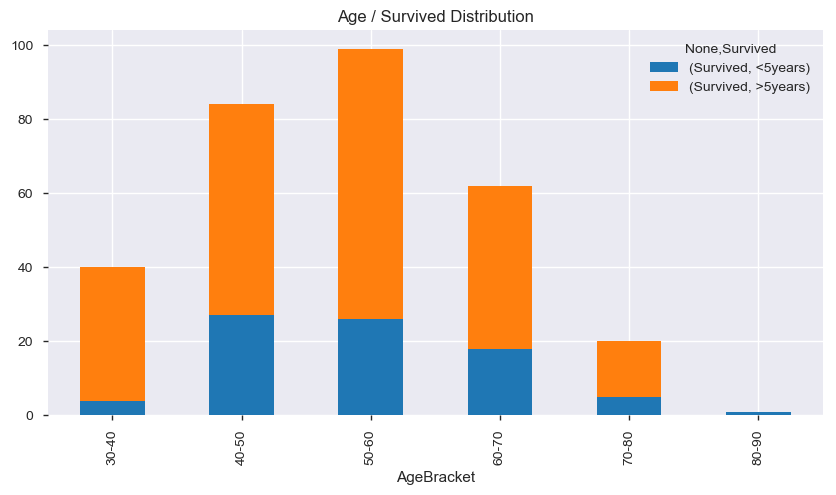

In [24]:
f,ax = plt.subplots(1,1,figsize=(10,5))

dfTemp =df_bcancer[df_bcancer['Age']!=0]
#print(dfTemp.head())
dfStack = dfTemp.groupby(['AgeBracket','Survived']).agg({'Survived':"count"})
print(dfStack.head())
dfStack = dfStack.unstack()
print(dfStack.head())
dfStack.plot.bar(ax=ax,stacked=True)
ax.set_title('Age / Survived Distribution')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1804: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


Text(0.5, 1.0, 'Age / Survived(%age)')

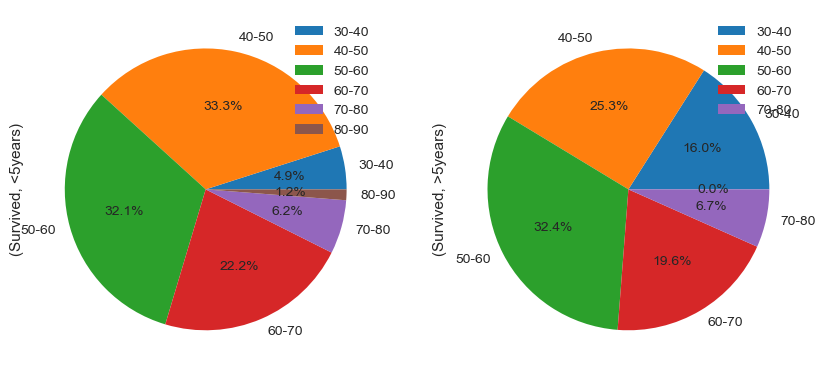

In [25]:
f,ax = plt.subplots(1,2,figsize=(10,7))

dfTemp =df_bcancer[df_bcancer['Age']!=0]

dfStack = dfTemp.groupby(['AgeBracket','Survived']).agg({'Survived':"count"})
#print(dfStack)
dfStack = dfStack.unstack()
#print(dfStack)
dfStack.plot.pie(autopct='%1.1f%%',ax=ax[0],subplots=True)
ax[0].set_title('Age / Survived(%age)')

    - 65% of the age group falling under 40-60 were those who couldnt survive <5 years.
    - 60% of the same age group were able to survive >5years.
Notice __age__ of patients __dont__ have much impact on survival or deaths 

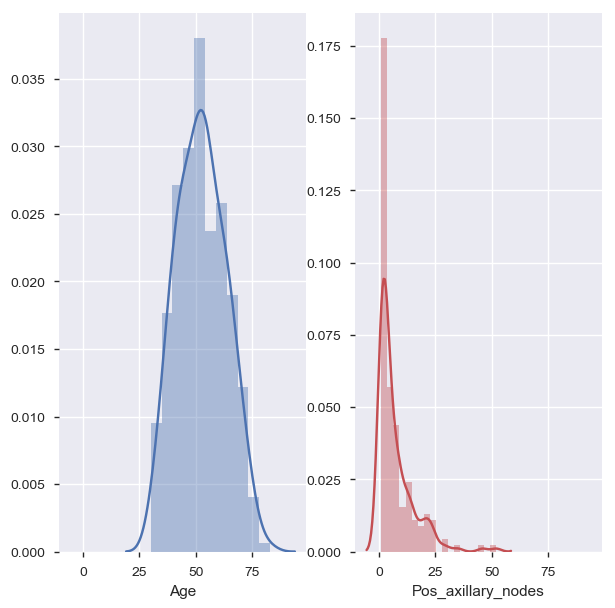

In [26]:
f, axes = plt.subplots(1, 2, figsize=(7, 7), sharex=True)                                    # Set up the matplotlib figure

dfTemp = df_bcancer[df_bcancer['Age']!=0]
sns.despine(left=True)
sns.distplot(dfTemp.Age, color="b", ax=axes[0])
dfTemp = df_bcancer[df_bcancer['Pos_axillary_nodes']!=0]
sns.distplot(dfTemp.Pos_axillary_nodes, color="r", ax=axes[1])


The __age__ is __normally__ distributed whereas the __positive axillary nodes__ is __right skewed__.

Text(0.5, 1.0, 'Age distribution vs Survial Status using FacetGrid')

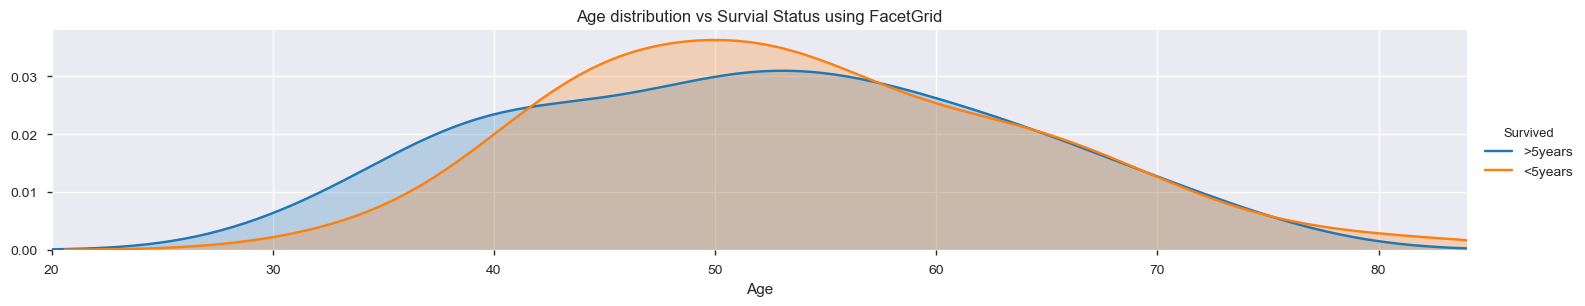

In [27]:
dfTemp = df_bcancer[df_bcancer['Age']!=0]

as_fig = sns.FacetGrid(dfTemp,hue='Survived',aspect=5)

as_fig.map(sns.kdeplot,'Age',shade=True)

oldest = dfTemp['Age'].max()
youngest = dfTemp['Age'].min()
#print(oldest)
as_fig.set(xlim=(youngest-10,oldest+1))

as_fig.add_legend()
plt.title('Age distribution vs Survial Status using FacetGrid')

__Age__ is __normally distributed between >5year and <5years survivals__ and the __mean is around 50 years__ for both.

<a id=section404></a> 
### 4.4 How the survivals and year of operation related?

Text(0.5, 1.0, 'Time vs Survial Status using FacetGrid')

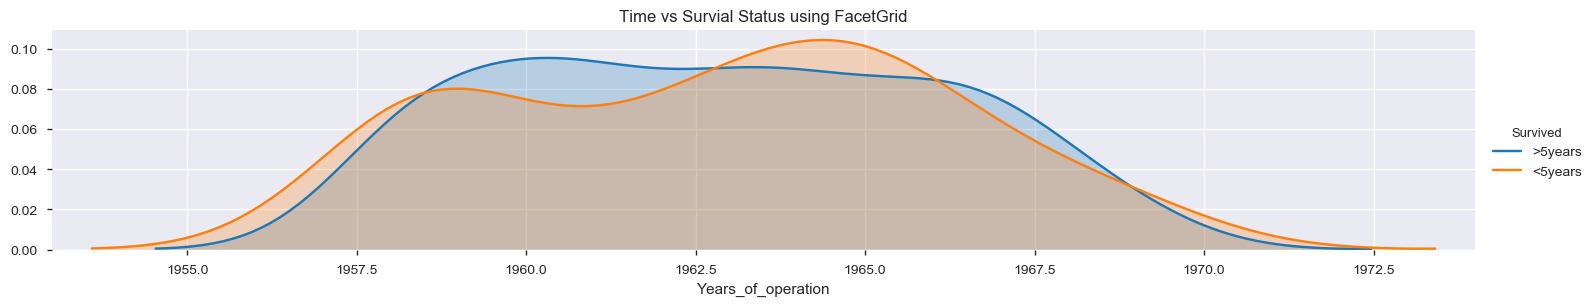

In [28]:
dfTemp = df_bcancer[df_bcancer['Age']!=0]

as_fig = sns.FacetGrid(dfTemp,hue='Survived',aspect=5)

as_fig.map(sns.kdeplot,'Years_of_operation',shade=True)

oldest = dfTemp['Years_of_operation'].max()
youngest = dfTemp['Years_of_operation'].min()
#print(oldest)
as_fig.set(xlim=(youngest-5,oldest+5))

as_fig.add_legend()
plt.title('Time vs Survial Status using FacetGrid')

In [29]:
df_bcancer.head()

,Age,Years_of_operation,Pos_axillary_nodes,Status,PAN_Stage,Survived,AgeBracket
0,30,1964,1,1,PS-N1,>5years,30-40
1,30,1962,3,1,PS-N1,>5years,30-40
2,30,1965,0,1,PS-N0,>5years,30-40
3,31,1959,2,1,PS-N1,>5years,30-40
4,31,1965,4,1,PS-N2,>5years,30-40


Majority of deaths happened between __1959 and 1966 after that there was declined due to good invention of better medications__ for both (<5 and >5 years)

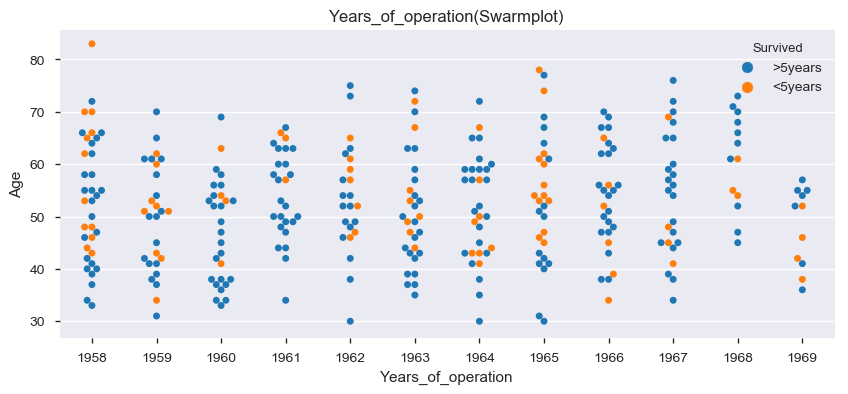

In [30]:
dfTemp = df_bcancer[df_bcancer['Age']!=0]

# Initialize Figure and Axes object
fig, ax = plt.subplots(figsize=(10,4))

# Set title
ax.set_title('Years_of_operation(Swarmplot)')

dfTemp = df_bcancer[df_bcancer['Age']!=0]
sns.swarmplot(x="Years_of_operation", y="Age",hue="Survived", data=dfTemp,ax=ax)

Majority of deaths happened __between 1958 and 1966 after that there was decline__ for both (<5 and >5 years)

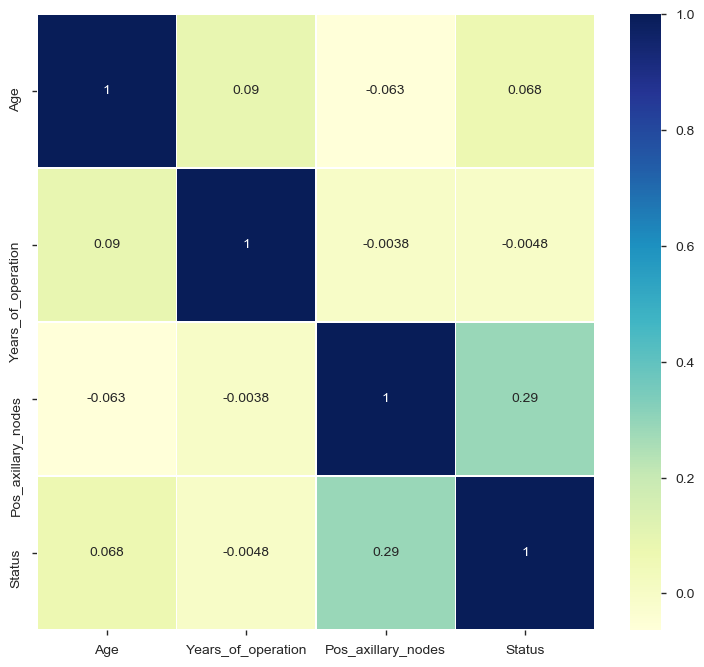

In [31]:
dfTemp = df_bcancer[df_bcancer['Age']!=0]

corrmat = dfTemp.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1,annot=True) 

From Above, there is __positive correlation between Positive axillary nodes and Status(Survival)__ which is also proven by using the violin and swarm plot.

<a id=section405></a> 
### 4.5 Hypothesis: More women with less axillary nodes are more likely to survive after 5 years 

<a id=section405></a> 
## 5. Conclusion 

- With the help of this notebook we learnt how exploratory data analysis can be carried out using Pandas plotting.
- Also we have seen making use of packages like __matplotlib and seaborn__ to develop better insights about the data.<br/>
- We have also seen how __preproceesing__ helps in dealing with _missing_ values and irregualities present in the data. We also learnt how to _create new features_ which will in turn help us to better predict the survival. 
- We also make use of __pandas profiling__ feature to generate an html report containing all the information of the various features present in the dataset.
- We have seen the impact of columns like Age, postitive axillary nodes and year of operation on the __rate of survival > 5 years__
- The most important inference drawn from all this analysis is, we get to know what are the __features on which survival is highly positively and negatively coorelated with.__ 
- This analysis will help us to choose which __machine learning model__ we can apply to predict survival of test dataset. 